<br>
<center>
<font size="6" color="firebrick" face="Arial">The Subway Reviews Problem</font><br>
</center>
<br>
<center>
<font size="4" color="firebrick" face="Arial">Assignment 2 - Individual</font><br>
</center>
<br>
<center>
<font size="3" color="darkslategray" face="Times New Roman">Nisha Ramasubramonian (nr352)</font><br>
<center>
<font size="3" color="darkslategray" face="Times New Roman">BANA 5440 - Statistical Programming in Python</font>
</center>

# Part One: Setting Up the Project

In [34]:
#import pandas as pd
import pandas as pd

In [35]:
#import seaborn as sns
import seaborn as sns

In [36]:
#importing mathplotlib
import matplotlib.pyplot as plt

In [37]:
#importing numpy as np
import numpy as np

In [38]:
#check directory
import os
os.getcwd()
#Change directory
os.chdir('/Users/nisharams/Desktop/Individual Assignment')

In [39]:
#reading two csv files
restaurants = pd.read_csv("restaurants.csv")
reviews = pd.read_csv("reviews.csv")

In [40]:
#inspecting the restaurant dataframe using info and head method
restaurants.head()
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   7409 non-null   int64 
 1   business_id  7409 non-null   object
 2   name         7409 non-null   object
 3   city         7409 non-null   object
 4   state        7409 non-null   object
 5   categories   7396 non-null   object
dtypes: int64(1), object(5)
memory usage: 347.4+ KB


In [41]:
#inspecting the reviews dataframe using info and head method
reviews.head()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432921 entries, 0 to 432920
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   432921 non-null  int64  
 1   review_id    432921 non-null  object 
 2   user_id      432921 non-null  object 
 3   business_id  432921 non-null  object 
 4   stars        432921 non-null  float64
 5   date         432921 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 19.8+ MB


In [42]:
#merging datasets with common column business_id
rate=pd.merge(restaurants,reviews,how ='left', on='business_id')
#Displaying merged data frame "rate"
rate.head()

,Unnamed: 0_x,business_id,name,city,state,categories,Unnamed: 0_y,review_id,user_id,stars,date
0,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273135,1SjnwHdmN22pSy6Wu4uybw,94ICh-yDZXOOGu-e33C6RA,5.0,2017-11-06 16:43:08
1,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273136,zjnxbX9QmuvRE6ycbQX-HQ,-WbrGDEWqgF4SqdpbFYCrQ,5.0,2018-05-19 03:54:37
2,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273137,2vJ1ljPWZBr8VPJBkQqlew,2dlEgB61BbJLyyq2xZgn3Q,5.0,2017-03-03 18:29:59
3,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273138,tcK5dYq_r0Mc00lxLSVmPw,a0DnfD31lNdiBTY2-YBBFA,4.0,2017-06-28 01:56:40
4,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273139,H6FDp7XkKAteRe9YhQAW0Q,o6XA_frgPR48BKXLbydmsw,5.0,2018-06-26 18:35:16


In [43]:
#Extracting to create a year column
#Using pandas library to convert the values in the date column of the 'rate' Dataframe to datetime objects
#Use to_datetime() method to convert the values in the 'date' column of the 'rate' DataFrame to datetime objects.
#Converting values because dt.year method can only be used on datetime objects.
rate['year'] = pd.to_datetime(rate['date']).dt.year
#Print the first few rows of the updated 'rate' Dataframe using head() method to see if the 'year' column is added
rate.head()

,Unnamed: 0_x,business_id,name,city,state,categories,Unnamed: 0_y,review_id,user_id,stars,date,year
0,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273135,1SjnwHdmN22pSy6Wu4uybw,94ICh-yDZXOOGu-e33C6RA,5.0,2017-11-06 16:43:08,2017
1,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273136,zjnxbX9QmuvRE6ycbQX-HQ,-WbrGDEWqgF4SqdpbFYCrQ,5.0,2018-05-19 03:54:37,2018
2,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273137,2vJ1ljPWZBr8VPJBkQqlew,2dlEgB61BbJLyyq2xZgn3Q,5.0,2017-03-03 18:29:59,2017
3,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273138,tcK5dYq_r0Mc00lxLSVmPw,a0DnfD31lNdiBTY2-YBBFA,4.0,2017-06-28 01:56:40,2017
4,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...",273139,H6FDp7XkKAteRe9YhQAW0Q,o6XA_frgPR48BKXLbydmsw,5.0,2018-06-26 18:35:16,2018


In [44]:
#Creating a Subway Dataframs
#Select rows from the from 'rate'Dataframe where the value in the name column is 'Subway' using .loc method
#Assign variable "subway" to new Dataframe
subway = rate.loc[rate['name']=='Subway']

In [45]:
#Comparing Rate and Subway Dataframe to check if it filtered properly
#Full Rate dataset items
rate.count()

Unnamed: 0_x    432921
business_id     432921
name            432921
city            432921
state           432921
categories      432831
Unnamed: 0_y    432921
review_id       432921
user_id         432921
stars           432921
date            432921
year            432921
dtype: int64

In [46]:
#Items in Subway Dataframe
subway.count()

Unnamed: 0_x    3623
business_id     3623
name            3623
city            3623
state           3623
categories      3623
Unnamed: 0_y    3623
review_id       3623
user_id         3623
stars           3623
date            3623
year            3623
dtype: int64

# Part Two: Problem Formulation and Analysis


## Question 1

***Part A:*** 
*Does the data support the statement made by the Head of Customer Service?*
- Head of Customer Service: “Our ratings are gradually improving, and we will soon reach 4.5/5.”

In [47]:
# Group the data by year and compute the average rating for each year
#Using .groupby method to group rows in the 'subway'Dataframe by the values 'year' column
#Using .mean() method to calculate the average rating of each group in the 'stars' column
#Assign variable rating_by_year to the output
rating_by_year = subway.groupby('year')['stars'].mean()

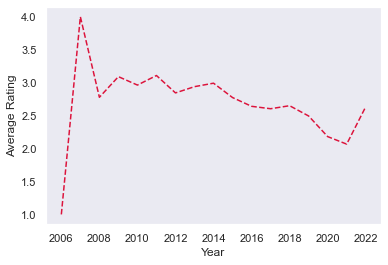

In [48]:
#Graphing the rating_by_year data
#Creating a line chart using plt.plot method
plt.plot(rating_by_year, linestyle='dashed', color='crimson')
#Labeling x- axis as "Year" and y-axis as "Average Rating"
plt.xlabel('Year')
plt.ylabel('Average Rating')

#Remove the grid background
plt. grid(False)

#Display dashed line chart using plt.show method
plt.show;

In [49]:
#Using groupby function create a new variable called 'number_rating' 
#Use Subway Dataframe to group the values in the 'year' column, select the 'stars' column and 
#apply the count method to set the value of the number of years counted for each group
number_rating = subway.groupby('year')['stars'].count()
#Display the resulting object using head method
number_rating.head()

year
2006     2
2007     2
2008     9
2009    11
2010    54
Name: stars, dtype: int64

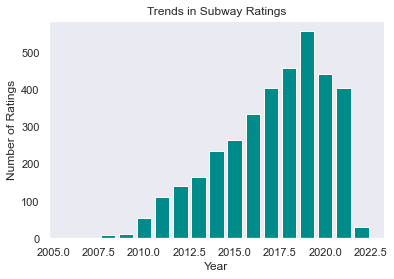

In [50]:
#Graphing the number_rating data
#Creating a bar chart using plt.bar method
plt.bar(number_rating.index, number_rating.values, color = 'darkcyan')
#Labeling x- axis as "Year" and y-axis as "Number of Ratings"
plt.xlabel('Year')
plt.ylabel('Number of Ratings')

#Removing the grod background
plt. grid(False)

#Using plt.title() method to create a title
plt.title("Trends in Subway Ratings")
#Display line chart using plt.show method
plt.show();

- Combined Graph

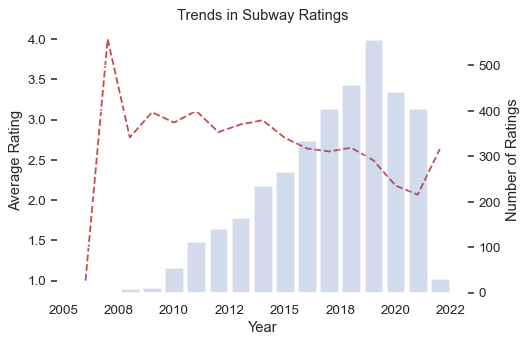

In [51]:
# Using Matplotlib library import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

#Create pandas Dataframe 
#Creating a Dataframe with mean ratings Subways 
rating_trend = pd.DataFrame(subway.groupby(["year"], as_index=False).stars.mean())
#Create a Dataframe with the number of unique ids per year
rating_cnt = pd.DataFrame(subway.groupby(["year"], as_index=False).review_id.nunique())

#Merge the two DataFrames on the "year" column
barline = rating_trend.merge(rating_cnt, how = 'left', on = ['year'])
#Resulting DataFrame by the "year" column gets sorted
barline.sort_values(by = ['year'], inplace = True)

#Create NumPy arrays 
#Create an array where the x-axis is years
x = np.array(barline['year'])
#Create a primary y-axis array for stars
y1 = np.array(barline['stars'])
#create a secondary y-axis array for review counts
y2 = np.array(barline['review_id'])

#Using lt.subplot create a plot 
fig, ax = plt.subplots(dpi = 88)
#Set the x and y-axis data using ax.plot function
#change the linestyle and color to dashed and red.
ax.plot(x, y1, 'r--')
#Using FormatStrFormatter from the matplot library, label the grid
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Year') #labeling the x-axis
ax.set_ylabel('Average Rating') #labeling the y-axis
ax.set_title('Trends in Subway Ratings') #adding the title to the grid

ax.set_facecolor('white') #change the background color to white

#Create a second y-axis using the twinx function and set it to a variable called ax2
ax2 = ax.twinx()
#Plot the bar chart using ax2.bar function 
#identify the x and y-axis data
#make the bar chart more transparent using alpha
ax2.bar(x,y2, alpha = 0.25)
ax2.set_ylabel('Number of Ratings');#label the y-axis

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
The data does not seem to support the statement made by the Head of Customer Service because the average rating has been having a downward trend throughout the years. There seems to be a small spike in ratings in 2022, however, the number of ratings has also decreased significantly during that time. In such cases, the average rating may be influenced by a small number of ratings, leading to a spike in the average rating.

**Part B:**
*Is this statement valid across all states?*

In [52]:
#Select rows from the dataframe 'subway' where the value in the 'state' column is either CA, NJ, FL, or IL
#store the resulting dataframe in the 'states' variable
#Use .loc method to select rows and columns from a pandas dataframe based on labels or boolean conditions in []
states = subway.loc[(subway['state']=='AZ') | (subway['state']=='PA')|(subway['state']=='FL')|(subway['state']=='IN')]
#check the states variable
states

,Unnamed: 0_x,business_id,name,city,state,categories,Unnamed: 0_y,review_id,user_id,stars,date,year
350080,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391966,YIKe5fqgSV1-BAPwivXudg,qBoCCxKWCimbqBUa4UqG2w,1.0,2020-03-06 00:16:47,2020
350081,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391967,LSosbr_M_4kqkYX9It_1pQ,kquxKibwL6ahCgywzKbtOg,1.0,2019-09-13 03:05:38,2019
350082,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391968,PrH3vRSL8gUgti8_jFGflA,7MIwhAW2GYbquzly2Nqj0Q,1.0,2019-09-01 00:53:42,2019
350083,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391969,kz-ab3v-HzjgwqnudRaTiQ,io76HoSQ7VgnYve1chZM3A,1.0,2021-06-06 23:20:39,2021
350084,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391970,ExD9S3eClW5wF36wpuvS2g,ed4gXi8sm5ZSF_5JMFcJow,1.0,2020-05-21 01:39:52,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
353685,22307,fra6poZMqkjuU0Gvhpb7hg,Subway,Tucson,AZ,"Sandwiches, Restaurants, Fast Food",300683,EyPt_n1Xt9MmKEkE06W5NQ,n1JTMTl0NQhl7pEIb4ck2Q,4.0,2014-01-28 21:10:34,2014
353686,22307,fra6poZMqkjuU0Gvhpb7hg,Subway,Tucson,AZ,"Sandwiches, Restaurants, Fast Food",300684,EvzWwGSK-36_3_oa1T-ynA,OwsYeNpz17vYTc82nzh_CQ,4.0,2020-05-12 17:01:54,2020
353687,22307,fra6poZMqkjuU0Gvhpb7hg,Subway,Tucson,AZ,"Sandwiches, Restaurants, Fast Food",300685,szlIupLC7cqsPUPRbDy31w,SIiw8nH3xHQ26L0-EGNPVQ,5.0,2020-08-16 03:56:14,2020
353688,22307,fra6poZMqkjuU0Gvhpb7hg,Subway,Tucson,AZ,"Sandwiches, Restaurants, Fast Food",300686,UrvoYAHiRqL5mnxtF1IG_Q,mJy-5ShuwwYRayxRtl6xxA,3.0,2013-08-16 04:47:33,2013


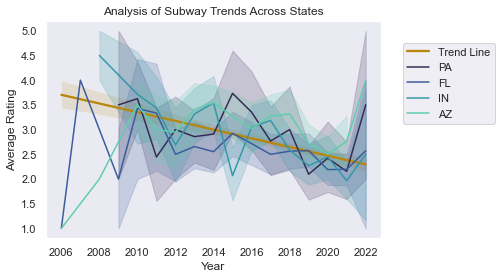

In [53]:
# import regplot function from seaborn library
from seaborn import regplot

# create a subplot using ax
ax = plt.subplot(111)

# Create a TrendLine using regplot
#Determine the x-axis and y-axis data
#Set the color to darkgoldenrod
#Use fit_reg parameter as True for the trend line
sns.regplot(data=states, x='year', y='stars', ax=ax, scatter=False, color='darkgoldenrod', label='Trend Line', fit_reg=True)

#Using lineplot function from seaplot graph a line for each state 
#Differentiate each state's line by setting hue variable as state
#Determine the x-axis and y-axis data
#Use palette parameter to specify the color scheme
sns.lineplot(data=states, x='year', y='stars', hue= 'state', palette = 'mako', ax=ax)

#Create a legend and anchor it so it does not cover the graph
plt.legend(bbox_to_anchor=(1,1), borderaxespad=2)

#Remove the grid background
plt.grid(False)

#Labeling the Lineplot
plt.ylabel('Average Rating') #Setting the y-axis label
plt.title('Analysis of Subway Trends Across States')#Setting the title
plt.xlabel('Year'); #Setting the x-axis label

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
There is an alleged negative relationship between average rating and year across states. 

To get a better understanding of the relationship of average rates across states, I  chose the state with    the highest number of subway stores at the four cardinal locations. In the West, Arizona had the highest at  47 stores. In the Northern region, Alberta had the highest number of stores at 54. However, since  Alberta is not part of the United States, I chose a state within the country which would be Indiana at     53 locations. The highest in the East was Pennsylvania at 24 Subways, and the South  had Florida with 73 stores. This gave a better understanding of Subways were behaving throughout   the country as a whole. 

According to the linear plot, it seems like most of the states are on the same trend line of having ratings go down between years 2008 and 2020. Arizona had a fall in 2015 when it was growing in the year before that. During the same year, Pennsylvania had   a spike of ratings that year. 

## Question 2

**Part A:**
*Does the data support the statement made by the Head of Store Operations?*
- Head of Store Operations: “Sandwiches are a tricky business. All sandwich chains suffer from poor customer ratings.”

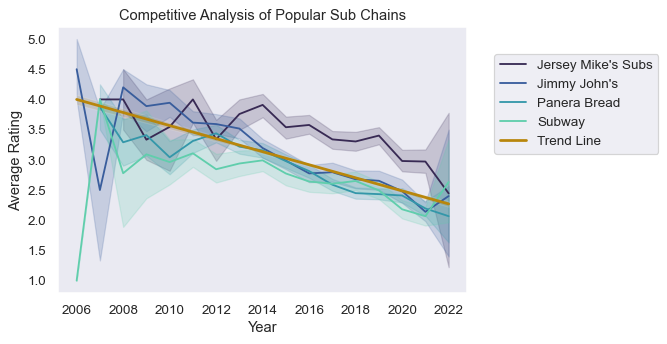

In [54]:
# Define a list of competition to subway which would be other popular sub chains
pop_subs = ['Panera Bread','Jersey Mike\'s Subs','Subway','Jimmy John\'s']
# Filter data to only include the sub shops
#Create a dataframe named competition with only popular sub chains in the rate dataframe
competition = rate.loc[rate['name'].isin(pop_subs)]

#Graph a linechart and axis object
#Change the dots per inch to 88
fig, ax = plt.subplots(dpi = 88)

#creates a linechart using the competition dataframe
#Determine the x and y-axis data
#Differentiate each sub chain's line by setting hue variable as name
#Use palette parameter to specify the color scheme
sns.lineplot(y ='stars', x = 'year', data = competition, hue = 'name', palette = "mako", ax=ax)

#Create a regression plot using the competition dataframe
#Determine the x and y-axis data
#Create a Trend line using regplot and remove the scatter and make it a line by setting scatter to False.
#Set the color of the trendline to darkgoldenrod
sns.regplot(data=competition, x='year', y='stars', ax=ax, scatter=False, color='darkgoldenrod', label='Trend Line')


#Label the lineplot
plt.xlabel('Year') #Setting the x-axis label
plt.ylabel('Average Rating') #Setting the y-axis label
plt.title ('Competitive Analysis of Popular Sub Chains') #Setting the title of the lineplot

#Create a legend and anchor it so it does not cover the graph
plt.legend(bbox_to_anchor=(1,1), borderaxespad=2) 


#Remove the grid background
plt. grid(False)

- *Are sandwiches the only tricky business?*

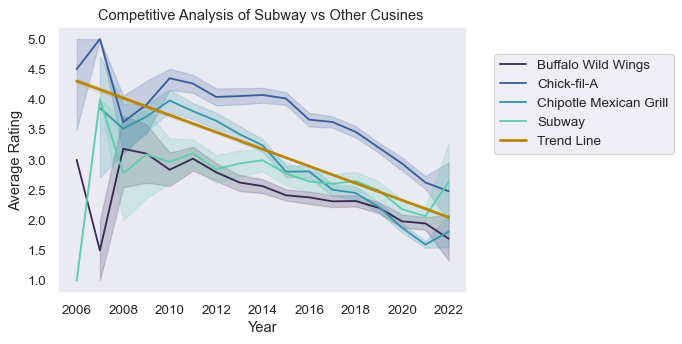

In [55]:
# Define a list of food chains that are a different cusine to Subway
pop_rest = ['Chipotle Mexican Grill', 'Chick-fil-A','Subway','Buffalo Wild Wings']

# Filter data to only include this defined list of food chains
#Create a dataframe named other with this filtered data in the rate dataframe
other = rate.loc[rate['name'].isin(pop_rest)]

#Graph a linechart and axis object
#Change the dots per inch to 88
#create a linechart using the other dataframe
#Determine the x and y-axis data
#Differentiate each food chain's line by setting hue variable as name
#Use palette parameter to specify the color scheme
fig, ax = plt.subplots(dpi = 88)
sns.lineplot(y ='stars', x = 'year', data = other, hue = 'name', palette = "mako", ax=ax)

#Create a regression plot using the other dataframe
#Determine the x and y-axis data
#Create a Trend line using regplot and remove the scatter and make it a line by setting scatter to False.
#Set the color of the trendline to darkgoldenrod
sns.regplot(data=other, x='year', y='stars', ax=ax, scatter=False, color='darkgoldenrod', label='Trend Line')


#Label the lineplot
plt.xlabel('Year')#Setting the x-axis label
plt.ylabel('Average Rating')#Setting the y-axis label
plt.legend(bbox_to_anchor=(1,1), borderaxespad=2) #Create a legend and anchor it so it does not cover the graph



plt.title ('Competitive Analysis of Subway vs Other Cusines ')#Setting the title of the lineplot
#Remove the grid background
plt. grid(False);

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
According to the graph on top, It could be determined that sandwiches are a tricky business since there seems to be a negative relationship between average rating and years for Subway and it’s competitors. I chose competitors based on whether they sell sandwiches similar to Subway. Jersey Mike’s and  Jimmy John’s both provide build your own sandwich services similar to Subway, and Panera is known for it’s bread for sandwiches.  Jersey Mike’s has managed to stay above the trend line, with one drop around 2010, but still declining. Subway seems to have the worst ratings compared to it’s competitors with them having the lowest average ratings in 2006 and the only business to go that low.

However with that being said, other fast food options also experienced a negative  trend over the years as seen in the second graph making it so that sandwiches are   not the only tricky business. Chick-fil-A being the only business to stay above the trend line with a drop around 2007. This could also be a result of the Chick-fil-A hot chicken sandwich that went viral because of social media. Subway continues to have the lowest averages according to the graph, with it being the only line going down 1 star. The highers wait times during Covid-19 could also explain the some of the lower ratings for fast food chains from 2020-2022. 

This suggests that though what the Head of Operations about “Sandwiches are a tricky business. All sandwich chains suffer from poor customer ratings.” could determined true, there are still some outliers showing that Subway has had the lowest ratings while others have maintained closer to the trend line. 

## Question 3

***Part A:*** *Does the data support the statement made by the Head of Social Media?*
- Head of Social Media: “The goal of 4.5/5 is unreasonable for national chains like us. Only small, local, and boutique restaurants can achieve such high ratings.”

In [56]:
#Merge the dataframes reviews and restaurants on the 'business_id' column
#Call this new merged dataframe df_sample
#Keep all rows from the 'reviews' dataframe and filling in missing values
df_sample = reviews.merge(restaurants[['business_id','name','state']], how = 'left', on = 'business_id')

#Create a new column in the df_sample dataframe and name it 'year'
#Use the year values of the date in the date column of the merged dataframe df_sample
df_sample['year'] = pd.to_datetime(df_sample['date']).dt.year

#Subset the df_sample dataframe to soley include rows where the year column values are 2021
df_sample = df_sample.loc[df_sample['year']==2021]

#Creating a new dataframe that uses groupby to group the name column in the restaurants dataframe and the counts the unique values
#Call this new datafram cities.
#Use the city column for each group. 
#Set the as_index parameter as False to keep the original index of the restaurants' dataframe.
cities = pd.DataFrame(restaurants.groupby(['name'], as_index = False).city.nunique())

#Create a new column called sizes in the cities dataframe. 
#Use the apply function to check the value of the city column and assign depending on the number
#assign chain if greater than 50
#assign local if it is equal to 1
#assign null if anything between 1 and 50
#Set the axis parameter equal to 1 so the function run on each row instead of column.
cities['sizes'] = cities.apply(lambda x: 'chain' if x['city']>50 
                              else 'local' if x['city'] == 1
                              else 'null', axis = 1)
#Creating a new dataframe and name it avg_restaurant by grouping the df_sample dataframe by the name column and the mean value of the stars
#Set the as_index parameter as False to keep the original index of the df_sample' dataframe
avg_restaurant = pd.DataFrame(df_sample.groupby(['name'], as_index = False).stars.mean())

#Merge the cities and avg_restaurant dataframes on the 'name' column
#Contain the rows from the avg_restaurant dataframe replacing missing values with NaN  within the cities dataframe
cities = avg_restaurant.merge(cities[['name','city','sizes']], how = 'left', on = 'name')

#Display the first few rows of the cities dataframe that was created
cities.head()

,name,stars,city,sizes
0,1000 Figs,4.466667,1,local
1,101 Taiwanese Cuisine,3.920000,1,local
2,12 South Bistro,1.000000,1,local
3,120 West Bar & Grill,1.000000,1,local
4,1200 Chophouse,4.117647,1,local


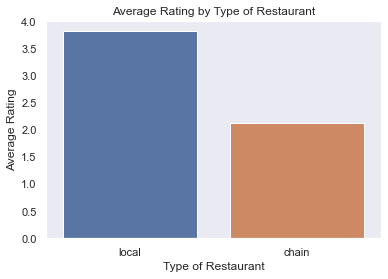

In [57]:
#Using the seaborn library set the style of the graph to darkgrid
sns.set(style="darkgrid")

#Create a bar plot using seaborn
#Determine the x and y-axis data
#set the confidence interval to 0
ax = sns.barplot(x="sizes", y="stars", data=cities, ci=0)

#Labeling the bar plot
plt.xlabel('Type of Restaurant')#Setting the x-axis label
plt.ylabel('Average Rating')#Setting the y-axis label
plt.title('Average Rating by Type of Restaurant')#Setting the title of the bar plot

#Remove the grid background
plt. grid(False)

#Display the barplot
plt.show()

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
The data does support the statement made by the Head of Social Media: “The goal of 4.5/5 is unreasonable for national chains like us. Only small, local, and boutique restaurants can achieve such high ratings.” because the average rating for restaurants deemed “local” had above a 3.5 star rating compared to chain restaurants which had about a 2 star rating. 

This also reflects back to the graph comparing chain restaurants in Question 2, where most chain restaurants are on a downard sloping trend. This could be because people want more of an experience when they go out that chain restaurants are missing. 

**Part B:** 
*Is it true that average rating decreases as the size of restaurant increases?*

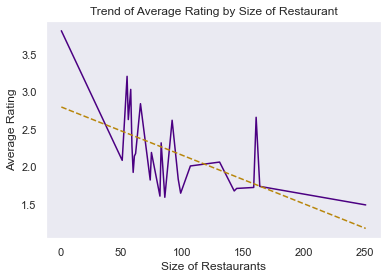

In [58]:
#Create a new dataframe using city names and average ratings
city_avg = pd.DataFrame(cities.groupby(['city'], as_index = False).stars.mean())
#Create a polynomial trendline to the graph
z = np.polyfit(city_avg['city'], city_avg['stars'], 1)
#Create a polynomial function based on the trendline
p = np.poly1d(z)

#Remove the grid background
plt. grid(False)
#Use plt.plot to plot the data 
#Set the color of the graph to indifo
plt.plot(city_avg['city'], city_avg['stars'], color = 'indigo')
#Create the trendline
#Set the color of the trendline to dargoldenrod and the linestyle to dashed 
plt.plot(city_avg['city'], p(city_avg['city']), color = 'darkgoldenrod', linestyle ='--')

#Labeling the line plot
plt.xlabel('Size of Restaurants') #Setting the x-axis label
plt.ylabel('Average Rating') #Setting the y-axis label
plt.title('Trend of Average Rating by Size of Restaurant') #Setting the title of the line plot

#Display the line plot
plt.show() 

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
There does not seem to a linear correlation (the dashed line showing the trend of the graph) between the size of the restaurant and rating. Though the average rating did decrease from about 3.5 stars to between 2 and 2.5 stars when the size increased from 0 to 50, it quickly peaked again in when after the increase from 50. As the size grew, the rating does not seem to fall under 1.5 stars showing that the size of the restaurant does not play a role in impacting the average rating. The average rating does not allegedly decrease as the size of restaurant increases.

## Question 4

**Part A:**
*Does the data support the statement made by the Chief Data Scientist?*
- Chief Data Scientist: “It is well known that customers make the effort to give a rating only when they are either extremely angry or absolutely delighted with the service. So online ratings are not reliable.”*

In [59]:
rating_counts = subway['stars'].value_counts()

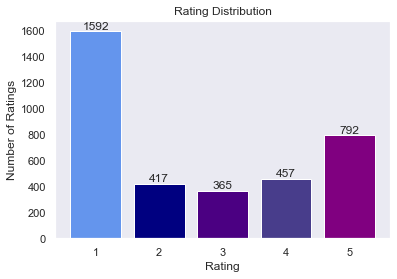

In [60]:
# Set up a list of colors for the bars
colors = ['cornflowerblue', 'purple', 'darkslateblue', 'navy', 'indigo']

#Plot the data
# Use loop to go through the rating_counts dataframe to make each bar a different color
for i, rating in enumerate(rating_counts.index):
    plt.bar(rating, rating_counts[rating], color=colors[i])
#Add a numerical value to each bar
    plt.text(x=rating, y=rating_counts[rating], s=rating_counts[rating], ha='center', va='bottom')

# Label the bar plot
plt.xlabel('Rating') #Setting the x-axis label
plt.ylabel('Number of Ratings') #Setting the y-axis label

# Use plt.title method to create title
plt.title("Rating Distribution")

#Remove the grid background
plt.grid(False)

# Display the bar chart using plt.show method
plt.show()

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
From this bar chart it can be inferred that customers find to not have the greatest experience at Subway. This could be the result of chain results like Subway are more common hence do not have a wow-factor. However it seems like the most drastic difference are the number of ratings that received one star (1592), and the amount of stars that received 5 stars was 792. There were 800 more 1 star ratings than 5 star reviews, and only 335 more 5 star ratings to 4 star reviews (457). This shows the data does not support the Cheif Data Scientist’s statement that customer’s make the effort to give a rating only when they are either extremely angry or absolutely delighted with the service. 

**Part B:** 
*Is the statement true across all years from 2018 to 2021?*

In [61]:
# Extract the rows where the year is between 2018 and 2021
years = subway.loc[(subway['year']>=2018)&(subway['year']<=2021)]
#Display the extracted rows
years 

,Unnamed: 0_x,business_id,name,city,state,categories,Unnamed: 0_y,review_id,user_id,stars,date,year
350080,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391966,YIKe5fqgSV1-BAPwivXudg,qBoCCxKWCimbqBUa4UqG2w,1.0,2020-03-06 00:16:47,2020
350081,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391967,LSosbr_M_4kqkYX9It_1pQ,kquxKibwL6ahCgywzKbtOg,1.0,2019-09-13 03:05:38,2019
350082,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391968,PrH3vRSL8gUgti8_jFGflA,7MIwhAW2GYbquzly2Nqj0Q,1.0,2019-09-01 00:53:42,2019
350083,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391969,kz-ab3v-HzjgwqnudRaTiQ,io76HoSQ7VgnYve1chZM3A,1.0,2021-06-06 23:20:39,2021
350084,21928,qqBPf0WQf8EUahAuO9oN1A,Subway,West Chester,PA,"Fast Food, Restaurants, Sandwiches",391970,ExD9S3eClW5wF36wpuvS2g,ed4gXi8sm5ZSF_5JMFcJow,1.0,2020-05-21 01:39:52,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
353687,22307,fra6poZMqkjuU0Gvhpb7hg,Subway,Tucson,AZ,"Sandwiches, Restaurants, Fast Food",300685,szlIupLC7cqsPUPRbDy31w,SIiw8nH3xHQ26L0-EGNPVQ,5.0,2020-08-16 03:56:14,2020
353689,22307,fra6poZMqkjuU0Gvhpb7hg,Subway,Tucson,AZ,"Sandwiches, Restaurants, Fast Food",300687,0hbQtzIxSbToxoJSfivoSw,GQGoGedajyok75a7aNTn1g,1.0,2020-11-02 23:30:00,2020
353699,22308,ZCJtBGZ3uZlXSgKGUMVo-w,Subway,Nashville,TN,"Sandwiches, Fast Food, Restaurants",217330,INiFmVkxA7zxT12O9MUeAA,S9TkOQKZjeFkMHCFoH7sew,1.0,2019-04-02 01:28:58,2019
353700,22308,ZCJtBGZ3uZlXSgKGUMVo-w,Subway,Nashville,TN,"Sandwiches, Fast Food, Restaurants",217331,FRbk-8VIqVZ67Oxq1-T63g,42G17dFQL5gEye0d5cFdEg,1.0,2021-01-29 16:43:54,2021


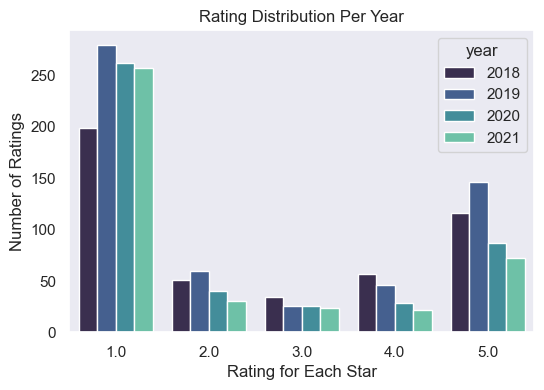

In [62]:
#Create a list of the specified years and call it yr
yr = [2018, 2019, 2020, 2021]
#Create a sub dataframe from the main subway dataframe that only includes the rows where the values coincide with the list created
subway_recent = subway.loc[subway['year'].isin(yr)]

#Ceate a figure with a single subplot
#Assign the Axes object to the variabel figure 1
figure1 = plt.subplots(dpi = 100)

#Using seaborn create a count of the number of stars 
#Set hue parameter to differentiate year
#set data to the subway_recent dataset 
#Set color palette
figure1 = sns.countplot(x='stars', hue = 'year', data = subway_recent , palette = "mako")

#Label the bar plot
figure1.set_xlabel('Rating for Each Star') #Setting the x-axis label
figure1.set_ylabel('Number of Ratings') #Setting the y-axis label

#Remove the grid background
plt. grid(False)

#Set the title of the bar plot
figure1.set_title('Rating Distribution Per Year');

<font size="4" color="seagreen" face="Arial">Statistical Inference:</font><br>
The trend seems to stay consistent throughout the years. Subway  has the highest numer of 1 star ratings and less 5-star ratings. If both 1 and 5 star ratings were at the comparable heights it could be said that the statement made by the Cheif Data Scientist is true, however since this seems to be consistent in the last four years that 1 star ratings received the highest of number of ratings compared to the rest, it means Subway needs to make more changes to improve their customer satisfaction.

## Question 5

*Is there cause for John to worry?*


John and his team should worry as Subway’s ratings are consistently trending downwards, as seen on the insights generated from Questions 1 through 4. 

*Is the target of 4.5/5 reasonable? 
-If “yes,” justify your answer. 
-If “no,” what do you think would be reasonable and why?*

The target of 4.5/5 can be deemed unreasonable. As seen in the graphs in Question 4 Subway has received 1,592 1 star ratings compared to 492 5 star ratings, and they have consistently received the highest number of 1 star ratings in the last four years. Receiving a 4.5/5 would be a significant improvement compared to where their performance is currently at.



## Question 7


**Bonus question:**
*What additional insight on ratings can you provide John?*

<font size="4" color="seagreen" face="Arial">Statistical Inference of Additional Insights:</font><br>
They have relatively similar number of ratings however the West Coast has lower number of 1 star (367) than 5 stars (288) compared to the east coast. This could be explained by the more number of cities known for their own local sandwiches located in the East (as shown in the two linear graphs). 

**Visualization #1:** *West Coast compared to East Coast* <br>
- Does region make a difference 

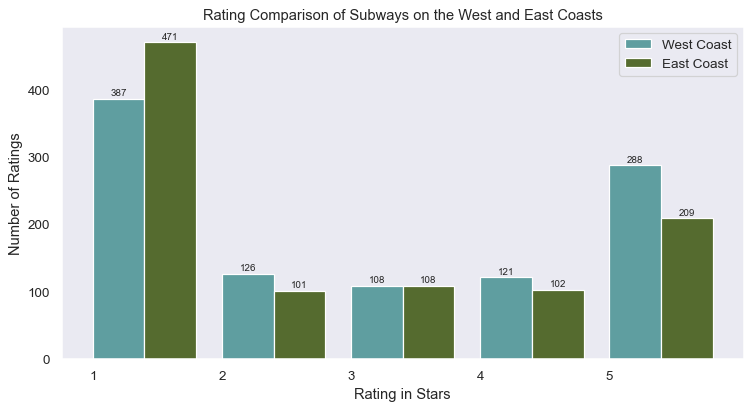

In [63]:
#Import the matplot library as plt
import matplotlib.pyplot as plt

# Define a list of states in the datasets which would be categorized as West
west = ['CA','NV','AZ', 'ID']
#Create a dataframe called west_rate using the defined west list
west_rate = subway.loc[subway['state'].isin(west)]


# Define a list of states in the datasets which would be categorized as East
east = ['PA','MO','TN', 'NJ']
#Create a dataframe called west_rate using the defined east list
east_rate = subway.loc[subway['state'].isin(east)]

#Create a variable called west_counts by counting the stars column for the west
#Sory the index of unique values in the stars column for that region
west_counts = west_rate['stars'].value_counts().sort_index()
#Create a variable called west_counts by counting the stars column for the east
#Sory the index of unique values in the stars column for that region
east_counts = east_rate['stars'].value_counts().sort_index()


#Create a list of the west_count variable counts and have them be the x-values
x_values = list(west_counts.index)

#Determine the height of the west list 
west_heights = list(west_counts.values)
#Determine the height of the east list 
east_heights = list(east_counts.values)

#Graph a linechart and axis object
#Change the dots per inch to 88
fig = plt.figure(figsize=(10, 5), dpi=88)

# Create subplot and call the variable cc
cc = fig.add_subplot(111)

    
# Create a bar plot using the bar function
#Create a bar using the height of the west dataframe
#set the color as cadetblue
cc.bar(x=x_values, height=west_heights, label='West', width=0.4, align='edge', color = 'cadetblue')
#Create a bar using the height of the east dataframe
#set the color as darkolivegreen
cc.bar(x=[x + 0.4 for x in x_values], height=east_heights, label='East', width=0.4, align='edge', color = 'darkolivegreen')    
    
    
    
#Determine the distance of the x-ticks so they do not overlap each other and are more visible
cc.set_xticks(x_values)
tick_positions = [x + 0.2 for x in x_values]


#Add a numerical value to each bar
#For each west coast bar
for rect in west_bar_rects:
    height = rect.get_height()
    x = rect.get_x()
    width = rect.get_width()
    cc.text(x=x+width/2, y=height+5, s=f'{height}', fontsize=8, ha='center')
#For each east coast bar
for rect in east_bar_rects:
    height = rect.get_height()
    x = rect.get_x()
    width = rect.get_width()
    cc.text(x=x+width/2, y=height+5, s=f'{height}', fontsize=8, ha='center')  
    
#Label the bar plot
cc.set_xlabel('Rating in Stars') #Setting the x-axis label
cc.set_ylabel('Number of Ratings') #Setting the y-axis label
cc.set_title('Rating Comparison of Subways on the West and East Coasts') #Setting the title for the whole bar plot

#Create a legend 
plt.legend(labels=['West Coast', 'East Coast'])

#Remove the background grid
plt. grid(False)

#Display the graph
plt.show()

**Visualization #2:** *Based on Subway Dataa* <br>
- How do Subway stores perform in cities famous for sandwhiches?

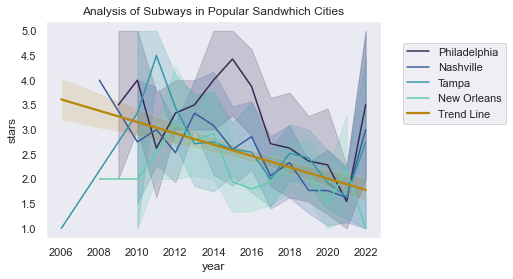

In [64]:
#Create a Data frame called restr_city that only holds rows that have the values in the city column from the subway dataframe
#City values include Philadelphia, New Orleans, Tampa, and Nashville)
sub_city = subway.loc[(subway['city']=='Philadelphia') | (subway['city']=='New Orleans')|(subway['city']=='Tampa')|(subway['city']=='Nashville')]

#Graph restr_city dataframe as a line plot using seaborn library
#Determine the x and y-axis data
#set the hue to differentiate city 
sns.lineplot(data=sub_city, x='year', y='stars', hue= 'city', palette = 'mako')

#Create a trend line using regplot 
#Set the trend line color to darkgoldenrod
sns.regplot(data=sub_city, x='year', y='stars', scatter=False, color='darkgoldenrod', label='Trend Line')

#Create a legend and anchor it so it does not cover the graph
plt.legend(bbox_to_anchor=(1,1), borderaxespad=2)

#Remove the grid background
plt. grid(False);

#Setting the title
plt.title ('Analysis of Subways in Popular Sandwhich Cities');

#Display the line plot
plt.show()

**Visualization #3:** *Based on All Data* <br>
- How do all restaurants perform in cities famous for sandwhiches?

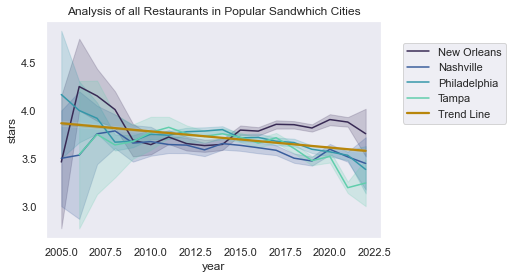

In [65]:
#Create a Data frame called restr_city that only holds rows that have the values in the city column from the rate dataframe
#City values include Philadelphia, New Orleans, Tampa, and Nashville)
restr_city = rate.loc[(rate['city']=='Philadelphia') | (rate['city']=='New Orleans')|(rate['city']=='Tampa')|(rate['city']=='Nashville')]

#Graph restr_city dataframe as a line plot using seaborn library
#Determine the x and y-axis data
#set the hue to differentiate city 
sns.lineplot(data=restr_city, x='year', y='stars', hue= 'city', palette = 'mako')

#Create a trend line using regplot 
#Set the trend line color to darkgoldenrod
sns.regplot(data=restr_city, x='year', y='stars', scatter=False, color='darkgoldenrod', label='Trend Line')

#Create a legend and anchor it so it does not cover the graph
plt.legend(bbox_to_anchor=(1,1), borderaxespad=2)

#Remove the grid background
plt. grid(False);

#Setting the title
plt.title ('Analysis of all Restaurants in Popular Sandwhich Cities')

#Display the line plot
plt.show()